In [123]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [124]:
all_df = pd.read_csv("data/titanic.csv")

In [125]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [126]:
X = df[:,1:]
Y = df[:,0]
X[:5]

array([[  1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   0.9167, 151.55  ],
       [  1.    ,   0.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,  30.    , 151.55  ],
       [  1.    ,   0.    ,  25.    , 151.55  ]])

In [127]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1046

In [128]:
train_Features[355:359]

array([[ 0.84246649, -1.34419751,  0.8216082 , -0.46039806],
       [ 0.84246649, -1.34419751,  0.09991351, -0.19415727],
       [ 0.84246649,  0.74393829, -0.18876436, -0.49092056],
       [-0.35140802, -1.34419751,  0.17208298, -0.23764487]])

In [129]:
train_Label[:4]

array([1., 0., 0., 0.])

In [130]:
test_Features.shape

(262, 4)

In [131]:
test_Label.shape

(262,)

In [132]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [133]:
train_Features.shape

(1046, 4)

In [134]:
train_Features = train_Features.reshape(train_Features.shape[0], 4, 1)

In [135]:
train_Features.shape

(1046, 4, 1)

In [136]:
from keras.utils import np_utils
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [137]:
model = Sequential()

In [138]:
model.add(Conv1D(filters=100,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(4,1), 
                 activation='relu'))

In [139]:
model.add(Conv1D(filters=50,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [140]:
model.add(MaxPooling1D(pool_size=1))

In [141]:
model.add(Dropout(0.25))

In [142]:
model.add(Flatten())

In [143]:
model.add(Dense(50, activation='tanh'))

In [144]:
model.add(Dropout(0.25))

In [145]:
model.add(Dense(2,activation='sigmoid'))

In [146]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 2, 100)            400       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 2, 50)             5050      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 2, 50)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 2, 50)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
__________

In [147]:
model.compile(loss='binary_crossentropy', 
              optimizer='Nadam', metrics=['accuracy'])

In [148]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=2, callbacks=[early_stopping])

Train on 836 samples, validate on 210 samples
Epoch 1/30
 - 1s - loss: 0.5799 - acc: 0.7386 - val_loss: 0.4980 - val_acc: 0.7524
Epoch 2/30
 - 0s - loss: 0.4698 - acc: 0.7805 - val_loss: 0.4887 - val_acc: 0.7714
Epoch 3/30
 - 0s - loss: 0.4738 - acc: 0.7733 - val_loss: 0.4827 - val_acc: 0.7714
Epoch 4/30
 - 0s - loss: 0.4662 - acc: 0.7757 - val_loss: 0.4831 - val_acc: 0.7524
Epoch 5/30
 - 0s - loss: 0.4662 - acc: 0.7775 - val_loss: 0.4806 - val_acc: 0.7738
Epoch 6/30
 - 0s - loss: 0.4619 - acc: 0.7787 - val_loss: 0.4797 - val_acc: 0.7548
Epoch 7/30
 - 0s - loss: 0.4622 - acc: 0.7817 - val_loss: 0.4829 - val_acc: 0.7738
Epoch 8/30
 - 0s - loss: 0.4506 - acc: 0.7883 - val_loss: 0.4779 - val_acc: 0.7810
Epoch 9/30
 - 0s - loss: 0.4580 - acc: 0.7877 - val_loss: 0.4753 - val_acc: 0.7833
Epoch 10/30
 - 0s - loss: 0.4581 - acc: 0.7865 - val_loss: 0.4820 - val_acc: 0.7786
Epoch 11/30
 - 0s - loss: 0.4552 - acc: 0.7901 - val_loss: 0.4743 - val_acc: 0.7905
Epoch 12/30
 - 0s - loss: 0.4586 - acc:

In [149]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

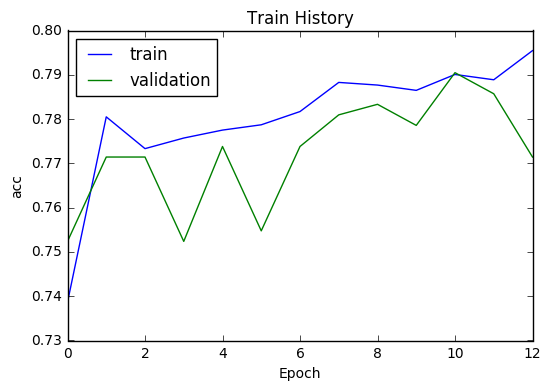

In [150]:
show_train_history(train_history,'acc','val_acc')

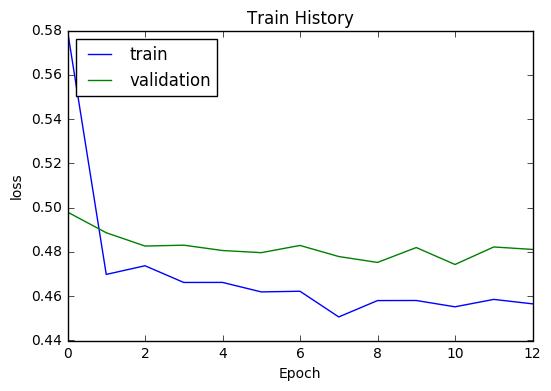

In [151]:
show_train_history(train_history,'loss','val_loss')

In [152]:
test_Features = test_Features.reshape(test_Features.shape[0], 4,  1)

In [153]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 101us/step


In [154]:
scores[1]

0.8053435114503816